In [ ]:
# (실습 1)
# 적은 데이터를 사용해 이미지 분류 모델 훈련 : 수백 개에서 수만 개 사이
# 4,000개의 강아지와 고양이 사진(2,000개는 강아지, 2,000개는 고양이)으로 구성된 데이터셋에서 강아지와 고양이 이미지를 분류
# 훈련을 위해 2,000개의 사진을 사용하고 검증과 테스트에 각각 1,000개의 사진을 사용.
# 기본 성능 측정

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gbmax/open/blob/master/DL/7.1-convnet_DogsNCats.ipynb)

In [11]:
# Colab 환경 사전작업
import os, shutil
if 'COLAB_GPU' in os.environ:
  Colab = True
else:
  Colab = False

os.getcwd()

'/home/pi/Code/DL'

In [12]:
!ls /content/drive

ls: cannot access '/content/drive': No such file or directory


In [13]:
!pwd

/home/pi/Code/DL


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# shutil.copy('/content/drive/MyDrive/Colab Notebooks/7.1-convnet(DogsNCats).ipynb','.')
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Colab Notebooks/data_org.zip', 'r') as zip:
  zip.extractall('data/data_org')
  print('Done')

Done


In [14]:
# =======================================================================================================

# (분석)
# 딥러닝은 데이터가 풍부할 때만 작동한다?
# 입력 샘플이 이미지와 같이 매우 고차원인 문제에서는 특히 훈련 샘플이 많아야만 가능.
# 컨브넷은 지역적이고 평행 이동으로 변하지 않는 특성을 학습하기 때문에 지각에 관한 문제에서 적은 데이타 적용 가능.

In [ ]:
# (참고) 원데이타 내려받기 위치 : https://www.kaggle.com/c/dogs-vs-cats/data

In [15]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
keras.__version__

'2.8.0'

In [22]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './data/data_org'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './data/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')

os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [25]:
# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [28]:
# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [29]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [ ]:
# (네트워크 구성)
# 이전보다 이미지가 크고 복잡한 문제이기 때문에 네트워크를 좀 더 크게 만듬.
# 특성 맵의 깊이는 네트워크에서 점진적으로 증가(32에서 128까지)
# `Flatten` 층의 크기가 너무 커지지 않도록 특성 맵의 크기는 감소합니다(150 × 150에서 7 × 7까지).
# 이진 분류 문제이므로 네트워크는 하나의 유닛(크기가 1인 `Dense` 층)과 `sigmoid` 활성화 함수.

In [30]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [36]:
model.layers[0].get_config()

{'name': 'conv2d_3',
 'trainable': True,
 'batch_input_shape': (None, 150, 150, 3),
 'dtype': 'float32',
 'filters': 32,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'valid',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'groups': 1,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 128)     

In [37]:
# 옵티마이저 : `RMSprop`
# 손실함수 : 이진 크로스엔트로피(binary crossentropy)
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

/home/pi/miniconda3/envs/study-tf/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


#### 데이터 전처리

In [ ]:
# 네트워크에 주입되기 전에 부동 소수 타입의 텐서로 변환
# `ImageDataGenerator` : 디스크에 있는 이미지 파일을 읽어서 전처리된 배치 텐서로 자동으로 바꾸어줌.

In [38]:
train_dir

'./data/cats_and_dogs_small/train'

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) # 모든 이미지를 1/255로 스케일을 조정
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,                  # 타깃 디렉터리
        target_size=(150, 150),     # 모든 이미지를 150 × 150 크기로
        batch_size=20,
        class_mode='binary')        # binary_crossentropy 손실을 사용

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
# 제너레이터는 이 배치를 무한정 만들어 냅니다(타깃 폴더에 있는 이미지를 반복)
# 반복 루프안의 어디에선가 `break` 문을 사용해야 함.
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [ ]:
labels_batch

array([0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1.], dtype=float32)

In [ ]:
# `fit_generator` : `fit` 메서드와 동일하되 데이터 제너레이터를 사용

history = model.fit_generator(
      train_generator,               # 입력과 타깃의 배치를 끝없이 반환
      steps_per_epoch=100,           # epoch당 제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지.
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)           # validation_steps = 1000(샘플수) /20(배치크기)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 23s 116ms/step - loss: 0.6917 - accuracy: 0.5330 - val_loss: 0.6690 - val_accuracy: 0.6180
Epoch 2/30
100/100 [==============================] - 12s 115ms/step - loss: 0.6539 - accuracy: 0.6120 - val_loss: 0.6381 - val_accuracy: 0.6270
Epoch 3/30
100/100 [==============================] - 11s 113ms/step - loss: 0.6076 - accuracy: 0.6690 - val_loss: 0.6314 - val_accuracy: 0.6350
Epoch 4/30
100/100 [==============================] - 11s 112ms/step - loss: 0.5763 - accuracy: 0.6945 - val_loss: 0.5909 - val_accuracy: 0.6690
Epoch 5/30
100/100 [==============================] - 11s 112ms/step - loss: 0.5433 - accuracy: 0.7360 - val_loss: 0.5809 - val_accuracy: 0.6690
Epoch 6/30
100/100 [==============================] - 11s 112ms/step - loss: 0.5192 - accuracy: 0.7430 - val_loss: 0.5870 - val_accuracy: 0.6720
Epoch 7/30
100/100 [==============================] - 11s 111ms/step - loss: 0.4872 - accuracy: 0.7635 - val_loss: 0.5621 - val_ac

In [ ]:
model.save('./data/cats_and_dogs_small_1.h5')

In [ ]:
import matplotlib.pyplot as plt

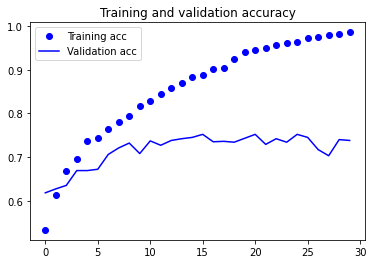

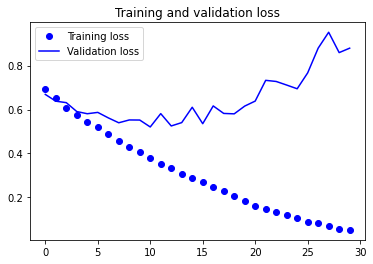

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# (분석)
# 과대적합 특징.
#   - 훈련 정확도는 100%에 근접하나 검증 정확도는 70-72% 수준.
#   - 검증 손실은 이른 epoch에 최솟값 도달
# 훈련 샘플의 수(2,000개)가 적기 때문에 과대적합이 가장 중요한 문제